In [24]:
from bibleMarginalia import *
from charity_citations import * 
from getTexts import * 
# EP: /Users/amycweng/Digital Humanities/eebotcp
# TCP: /Users/amycweng/Digital Humanities/TCP 

import os, re 
import pandas as pd
from collections import Counter
from wordcloud import WordCloud 
import matplotlib.pyplot as plt

def bar(orientation,data,title,color,labels):
    plt.figure(figsize = (15, 10))
    if orientation == 'horizontal': 
        plt.barh(data[0],data[1],color=color)
    else: 
        plt.bar(data[0],data[1],color=color)
    plt.title(title, fontsize=20)
    plt.xlabel(labels[0], fontsize=15)
    plt.xticks(fontsize=12,rotation=60)
    plt.ylabel(labels[1], fontsize=15)
    plt.yticks(fontsize=10)
    plt.show()


def wordcloud(counts, title): 
    word_cloud = WordCloud(background_color = "white", width=3000, height=2000, max_words=500, collocations=True).generate_from_frequencies(counts)
    plt.figure(figsize=(20,10))
    plt.imshow(word_cloud)
    plt.axis("off")
    plt.title(title,fontsize=18)
    plt.show()

In [12]:
csv_data = pd.read_csv('/Users/amycweng/Digital Humanities/sermons.csv')
tcpIDs = [ _ for _ in csv_data['id']]

all_specials = []
for idx, tcpID in enumerate(tcpIDs): 
    path = findTextTCP(tcpID)
    notes, specials = getMarginalia(path)
    for case in specials: 
        all_specials.append(case.split(' ')[0])
    with open(f'/Users/amycweng/Digital Humanities/charityMargin/{tcpID}NOTES.txt','w') as file: 
        for note in notes[0]: 
            file.write(f'{note}\n')
    if len(notes[1]) > 0: 
        print(f'Outlier formatting for {tcpID}: ', notes[1])
    if (idx+1) % 10 == 0 and idx != 0: 
        print(f'Processed {idx+1} files.')
print('Possibly missing abbreviations: ', Counter(all_specials))

Processed 10 files.
Processed 20 files.
Processed 30 files.
Processed 40 files.
Processed 50 files.
Processed 60 files.
Processed 70 files.
Possibly missing abbreviations:  Counter({'v': 123, 'c': 36, 'chap': 35, 'l': 34, 'sirac': 29, 'ioan': 23, 'cap': 17, 'thyest': 15, 'fur': 13, 'trist': 12, 'io': 11, 'pont': 10, 'agam': 9, 'part': 9, 'capt': 8, 'ibid': 8, 'ose': 8, 'lib': 8, 'ver': 7, 'vers': 7, 'ma': 6, 'wisd': 6, 'amor': 6, 'trinum': 6, 'exerc': 6, 'thy': 6, 'stc': 5, 'art': 5, 'amph': 5, 'a': 4, 'sal': 4, 'tom': 4, 'heaut': 4, 'sa': 4, 'adelph': 4, 'cum': 4, 'med': 4, 'thren': 4, 'm': 3, 'q': 3, 'sai': 3, 'stich': 3, 'controv': 3, 'mostell': 3, 'treat': 3, 'cro': 3, 'er': 3, 'say': 3, 'octav': 3, 'reg': 3, 'serm': 3, 'timo': 3, 'troad': 3, 'verse': 3, 'apocal': 3, 'esal': 2, 'pers': 2, 'pseud': 2, 'apc': 2, 'n': 2, 'dut': 2, 'in': 2, 'irem': 2, 'ibn': 2, 'ot': 2, 't': 2, 'trucul': 2, 'ca': 2, 'eun': 2, 'hippol': 2, 'pnt': 2, 'point': 2, 'ponto': 2, 'rud': 2, 'tibull': 2, 'var': 

In [37]:
all_notes = []
all_books = []
all_chapters = []
charity_margin = {}
new_citations = []

previous_citations = []
for topic_dict in allied_dict.values(): 
    for cited in topic_dict.keys(): 
        previous_citations.append(cited)

folder = '/Users/amycweng/Digital Humanities/charityMargin'
for notesfile in os.listdir(folder): 
    tcpID = notesfile.split('NOTES')[0]
    charity_margin[tcpID] = []

    notesfile = open(f'{folder}/{notesfile}','r')
    notes = [note.strip('\n') for note in notesfile.readlines()]
    notesfile.close()

    all_notes.extend(notes)
    for n in notes:             
        if n in bible_charity: 
            charity_margin[tcpID].append(n)
            if n not in previous_citations:
                new_citations.append(n)
        book = n.split(' ')
        if book[0] == '1' or book[0] == '2': 
            all_books.append(f'{book[0]} {book[1]}')
            chapter = book[2].split(':')[0]
            all_chapters.append(f'{book[0]} {book[1]} {chapter}')
        else: 
            all_books.append(book[0])
            chapter = book[1].split(':')[0]
            all_chapters.append(f'{book[0]} {chapter}')
print(f'Newly found citations related to charity: {(set(new_citations))}')

Newly found citations related to charity: {'Matthew 25:43', 'Luke 14:14', '1 Corinthians 13:3', 'Deuteronomy 12:14', 'Matthew 10:42', 'Deuteronomy 12:12', 'Hebrews 13:2', '1 Corinthians 16:1', 'Matthew 6:20', 'Job 31:20', 'Job 31:16', 'Acts 10:4', '1 Corinthians 16:2', '1 John 3:17', 'Acts 11:30', 'Romans 2:8', 'Galatians 6:10', '2 Corinthians 8:3', 'Matthew 25:36', 'Matthew 25:41', 'Proverbs 17:5', 'Proverbs 3:28', 'Isaiah 1:17', '2 Corinthians 8:11', 'Job 29:16', 'Luke 4:18', 'Luke 18:1', '1 Timothy 6:18', 'Deuteronomy 12:13', '2 Corinthians 9:7', '2 Corinthians 9:6', 'Job 31:22', '1 John 3:18', 'James 1:27', 'Ezekiel 16:49'}


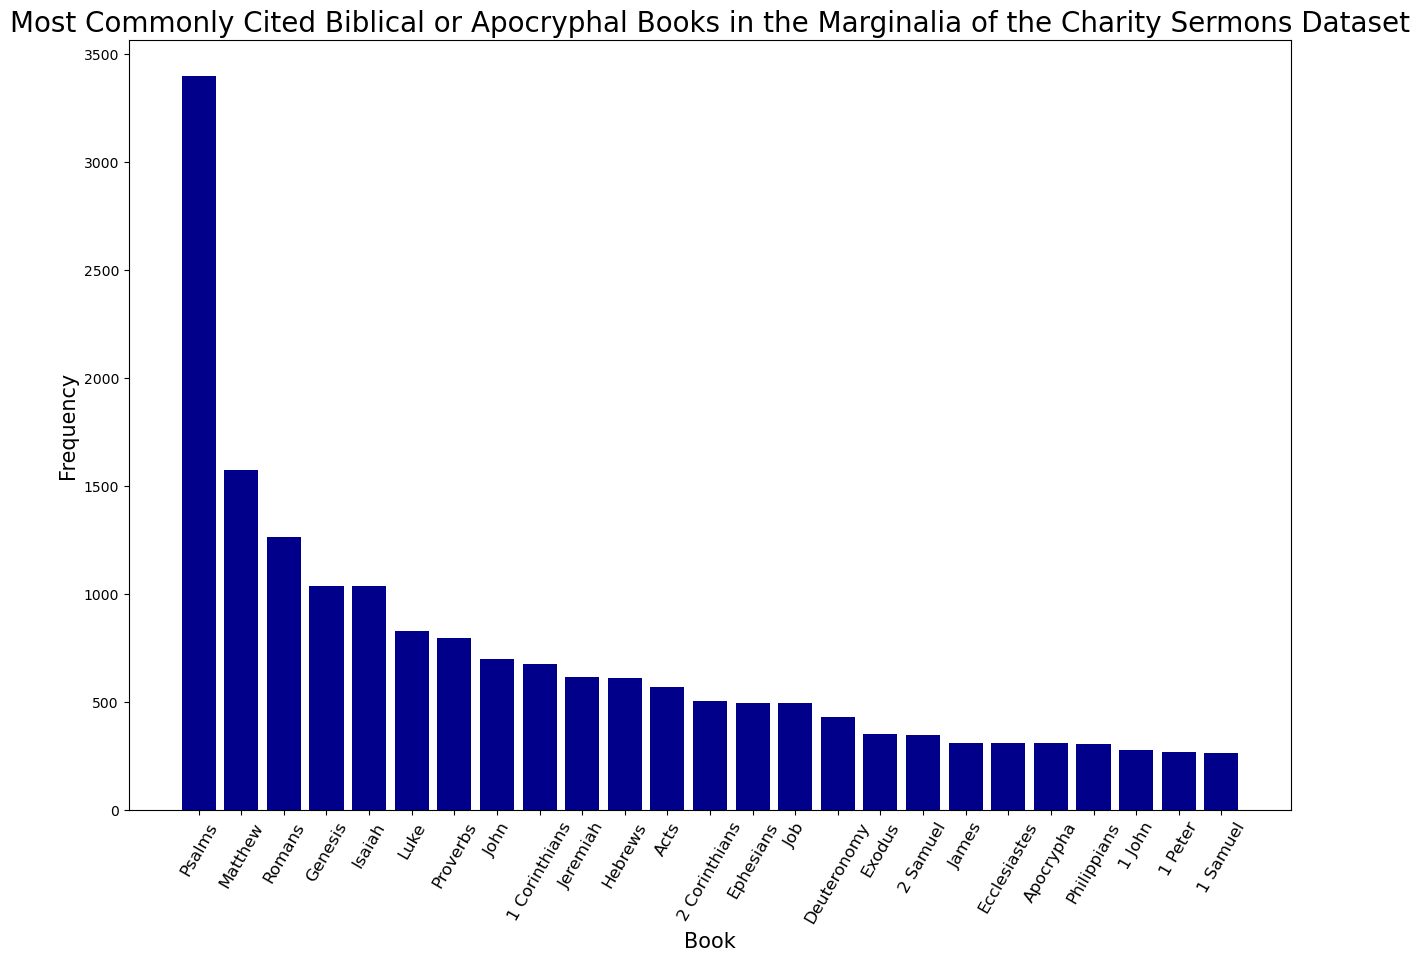

In [19]:
book_counts = Counter(all_books).most_common(n=25)
x,y = [],[]
for word,freq in book_counts: 
    x.append(word)
    y.append(freq)
bar('vertical',(x,y),'Most Commonly Cited Biblical or Apocryphal Books in the Marginalia of the Charity Sermons Dataset','darkblue',('Book','Frequency'))

[('Psalms 44', 335), ('Psalms 119', 295), ('Romans 8', 221), ('Romans 5', 181), ('Matthew 5', 163), ('Matthew 26', 152), ('James 1', 129), ('Romans 7', 129), ('Matthew 6', 123), ('Romans 6', 123), ('Genesis 3', 122), ('Philippians 3', 121), ('Ephesians 5', 121), ('Ephesians 4', 114), ('Hebrews 12', 102), ('1 Peter 1', 100), ('Matthew 24', 98), ('Psalms 51', 98), ('1 John 3', 95), ('2 Corinthians 5', 95), ('Matthew 25', 90), ('John 1', 89), ('1 Thessalonians 5', 88), ('1 Corinthians 15', 86), ('John 3', 85)]


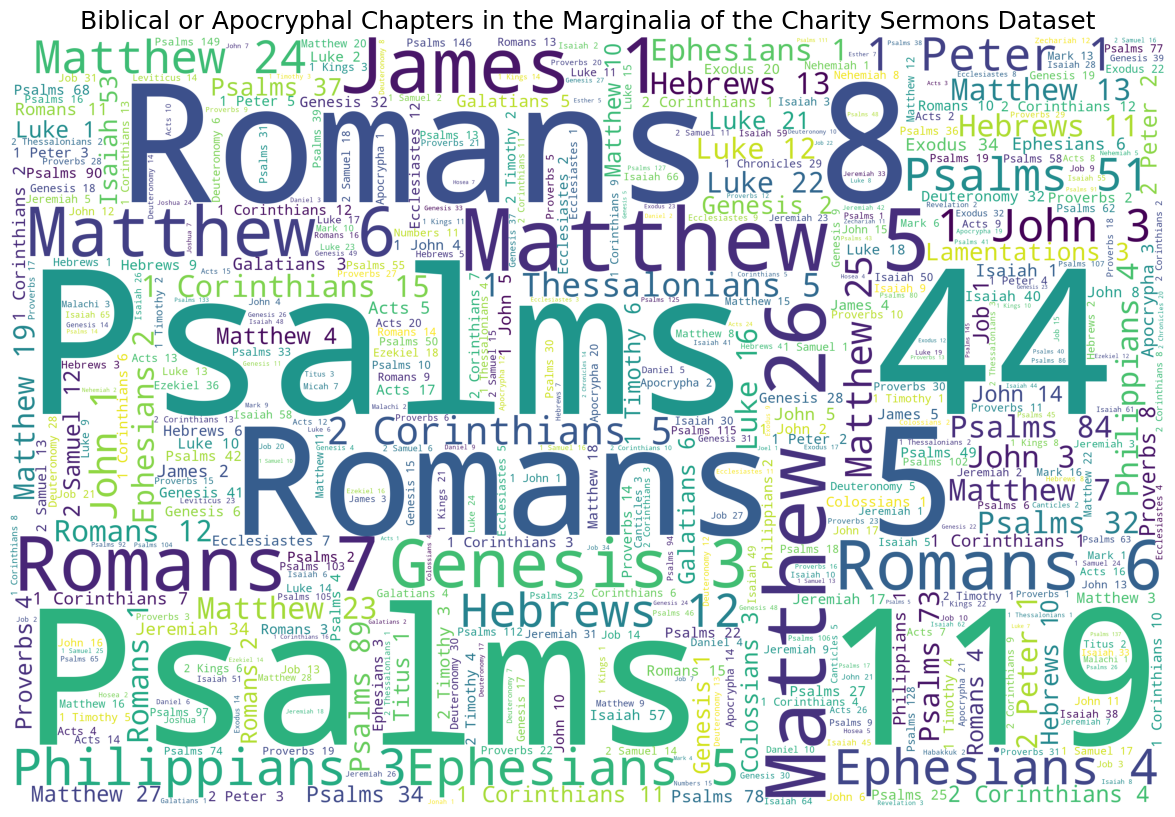

In [29]:
chapter_counts = Counter(all_chapters)
print(chapter_counts.most_common(n=25))
wordcloud(chapter_counts,'Biblical or Apocryphal Chapters in the Marginalia of the Charity Sermons Dataset')

[('Apocrypha 20:6', 27), ('Matthew 5:3', 23), ('Romans 5:3', 22), ('Romans 7:23', 22), ('James 1:17', 21), ('Genesis 1:27', 21), ('Hebrews 13:5', 21), ('Genesis 2:7', 21), ('1 Peter 5:8', 21), ('Psalms 68:4', 21), ('Mark 16:16', 20), ('Romans 14:17', 20), ('Ephesians 4:24', 20), ('John 1:12', 20), ('Psalms 32:11', 20), ('Romans 5:5', 20), ('Psalms 2:11', 20), ('Ecclesiastes 12:1', 19), ('Jeremiah 34:18', 19), ('Job 13:15', 19), ('Jeremiah 17:9', 18), ('John 3:16', 18), ('Hebrews 12:6', 18), ('1 Peter 1:23', 18), ('Psalms 84:11', 18)]


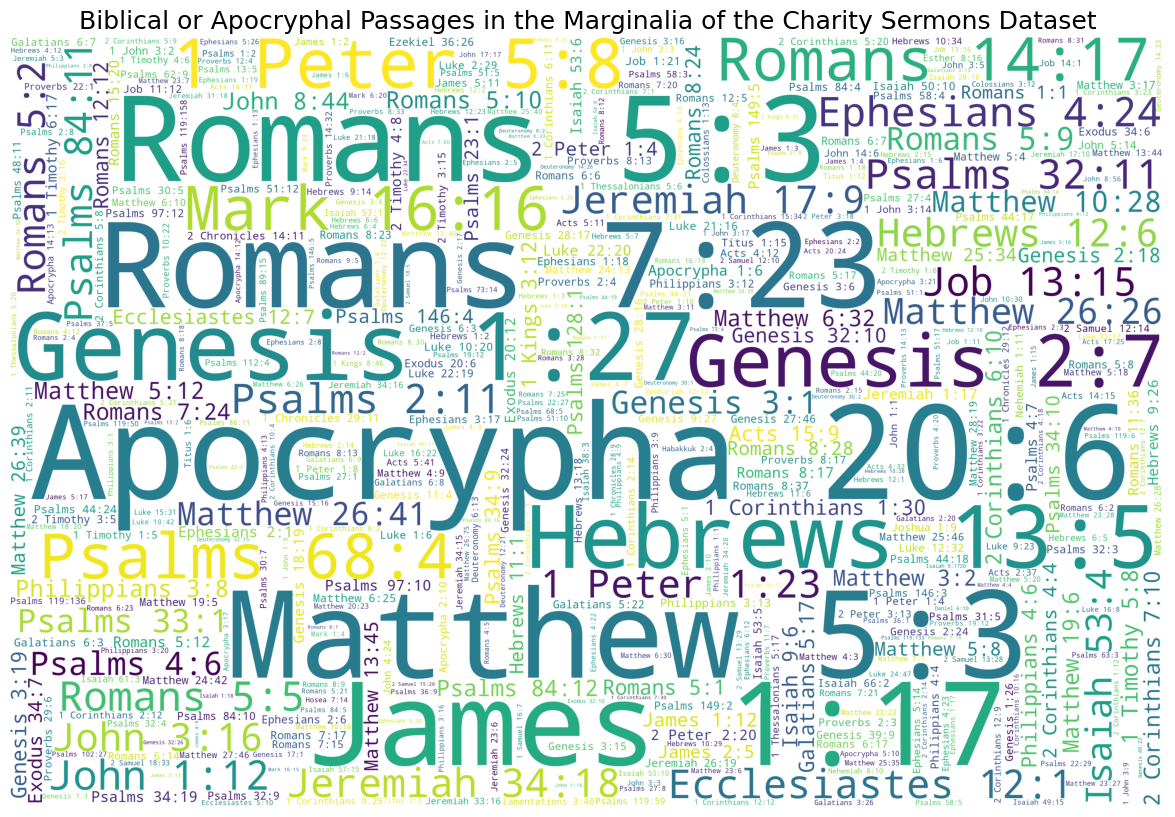

In [33]:
passage_counts = Counter(all_notes)
print(passage_counts.most_common(n=25))
wordcloud(passage_counts,'Biblical or Apocryphal Passages in the Marginalia of the Charity Sermons Dataset')

178


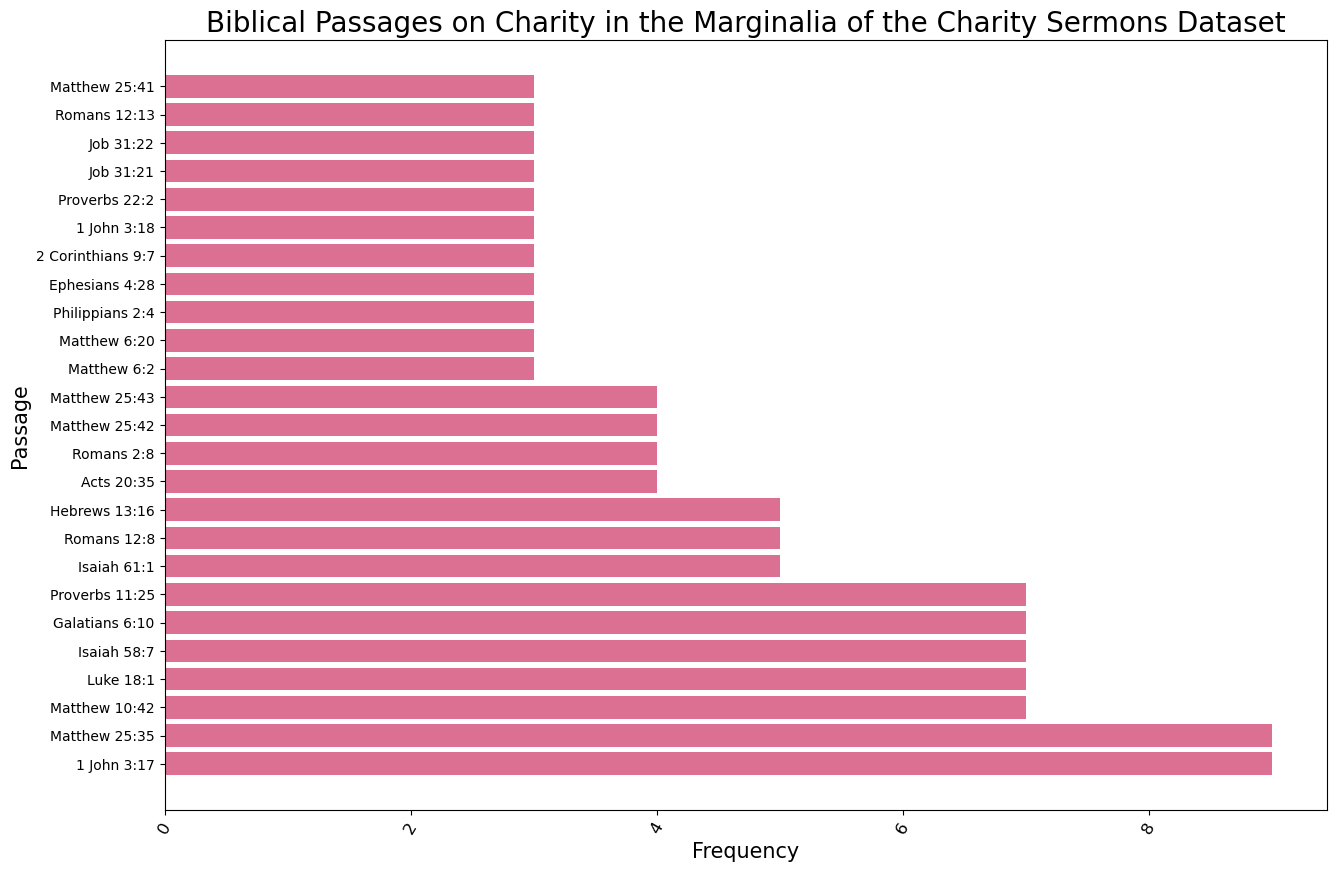

In [35]:
all_charity = []
for c_list in charity_margin.values():
    all_charity.extend(c_list)
print(len(all_charity))
charity_counts = Counter(all_charity).most_common(n=25)
x,y = [],[]
for word,freq in charity_counts: 
    x.append(word)
    y.append(freq)
bar('horizontal',(x,y),'Biblical Passages on Charity in the Marginalia of the Charity Sermons Dataset','palevioletred',('Frequency','Passage'))

In [38]:
citations = {'helping': [], 'performativity': [], 'punishment': [], 'kinship': [], 'solutions': [], 'godly': []}
cross_references = {'helping': [], 'performativity': [], 'punishment': [], 'kinship': [], 'solutions': [], 'godly': []}

for topic, topic_dict in allied_dict.items(): 
    for cited, allied_list in topic_dict.items(): 
        citations[topic].append(cited)
        for passage in allied_list: 
            text = re.sub('\:', ' ', passage)
            cross_references[topic].append(passage)
print('citations: ',citations,'\n')
print('cross references: ', cross_references)

citations:  {'helping': ['Acts 2:45', 'Mark 10:21', 'Matthew 19:21', 'Deuteronomy 15:7', 'Galatians 2:10', 'Isaiah 58:7', 'Isaiah 61:1', 'James 2:15', 'James 2:16', 'Job 29:12', 'Luke 11:41', 'Luke 12:33', 'Luke 14:12', 'Matthew 25:35', 'Philippians 2:4', 'Proverbs 3:27', 'Romans 12:8', 'Romans 12:13', 'Titus 3:14', 'Proverbs 31:9'], 'performativity': ['Matthew 6:1', 'Matthew 6:2', 'Matthew 6:4'], 'punishment': ['Matthew 25:42', 'Job 31:21', 'Proverbs 21:13'], 'kinship': ['Isaiah 58:7', 'Proverbs 22:2'], 'solutions': ['Ephesians 4:28'], 'godly': ['Acts 10:2', 'Hebrews 13:16', 'Proverbs 14:31', 'Proverbs 19:17', 'Mark 9:41', 'Proverbs 11:24', 'Proverbs 11:25', 'Proverbs 11:26', 'Acts 20:35', 'Proverbs 22:9']} 

cross references:  {'helping': ['Matthew 19:21', 'Mark 10:21', 'Deuteronomy 15:8', 'Matthew 5:42', 'Luke 6:34', 'Acts 11:30', '2 Corinthians 9:3', 'Matthew 25:35', 'Matthew 25:36', 'Ezekiel 18:7', 'Luke 4:18', 'Luke 4:19', 'Luke 7:22', 'Isaiah 42:7', 'Matthew 11:5', 'Psalm 147:3'